In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nbimporter
import  math
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..')
    
from Maze.Maze import Maze
from Maths.Cord import Cord
def behaviour(maze, placement):    
    
    data=np.zeros((maze.height, maze.width))
    for i in range(maze.height):
        for j in range(maze.width):
            if (maze.maze[i][j]==1 or maze.maze[i][j]==5):
                data[i][j]=float("NaN")
    sumData=0            
    for pos in placement:
        data[pos.X][pos.Y]+=1
        sumData+=1

        
    for i2 in range(maze.height):
        for j2 in range(maze.width):
               data[i2][j2]=data[i2][j2]#/sumData*100
                
    fig, ax = plt.subplots()
    #im = ax.imshow(data, cmap=plt.cm.jet)

    palette=plt.cm.plasma
    palette.set_bad('k',1.0)
    DATA=np.ma.array(data, mask=np.isnan(data))
    im=ax.imshow(DATA,interpolation='nearest',cmap=palette, vmin=0, vmax=100)
    
    plt.colorbar(im, ax=ax)    
    fig.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()
    #print(data)
    
def convert(StringCord):
    intCord=Cord(int(StringCord.split(",")[0].split("(")[1]),int(StringCord.split(",")[1].split(")")[0]))
    return intCord

def convertToClear(clearString, maze):
    clear=[]
    cords=clearString[1:len(clearString)-1].split(")(")
    for cord in cords:
        clear.append(Cord(int(cord.split(",")[0]),int(cord.split(",")[1])))
    clear.append(maze.Initial)
    for exit in maze.Exits:
        clear.append(exit)
    return clear



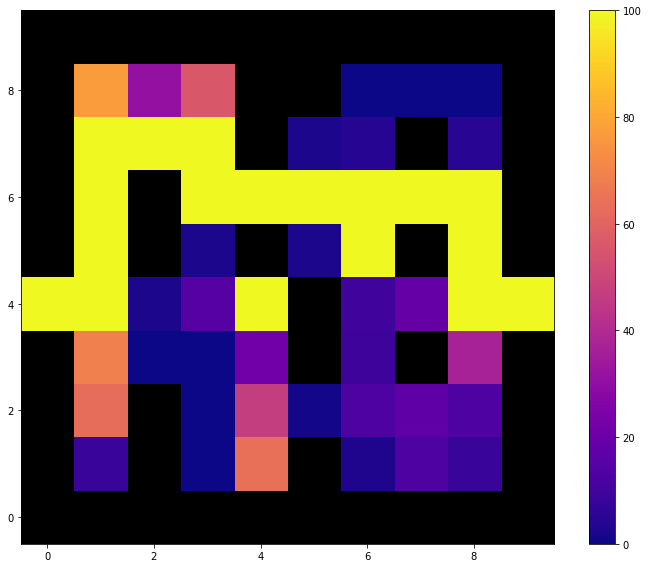

In [46]:
import nbimporter
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..')
from Windows.MainWindow import MainWindow
from Maze.Maze import Maze

path='DATA/Testing/exp1/Workers_1/'#Span_5Dim_10_10/'
file=open(path+"GamesData.txt","r")
f1=file.readlines()
#for line in f1:
    #print(line)    

#chosenLine=0
#print(len(f1))
pos=[]
initPlaces=[]
    
for l in range(len(f1)):
    chosenLine=l
    state=f1[chosenLine]
    parts=state.split("|")
    history=parts[1:(len(parts)-1)]
    m=parts[0]
    
    #pos=[]
    #initPlaces=[]
    #print(history)
    
    for i in range(len(history[0].split("#"))-1):

        pos.append(convert(history[0].split("#")[i+1].split("-")[1]))
    #pos.append(initPlaces)
    maze= Maze(m)
    for timeStep in history[1:len(history)]:

        parts2=timeStep.split("#")
        #print(parts2)
        for i in range(0,len(parts2)-2):
            #print(parts2[i+2].split("-")[1],len(parts2)-1)
            pos.append(convert(parts2[i+2].split("-")[1]))

    posS=""
    for p in pos:
        posS+=p.CordToString()+" "
    #print(posS)
    #print(history)
behaviour(maze,pos)

Mean of total length:  145.75806451612902
Mean of correct length:  137.24193548387098
Success rate:  0.967741935483871


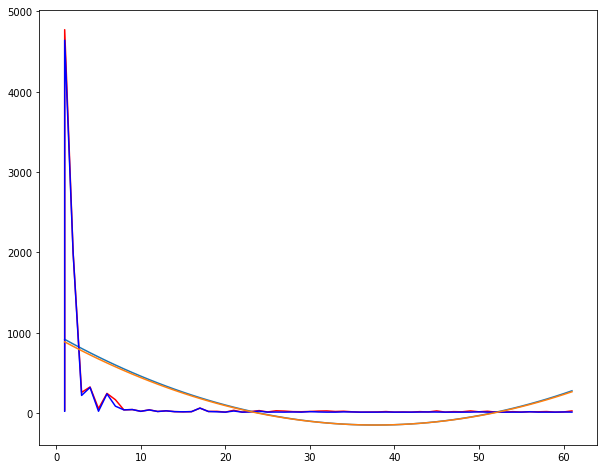

In [39]:
import numpy as np
file2=open("RunsData.txt","r")
f2=file2.readlines()
#for line in f2:
  #  print(line)    

#chosenLine=0
#print(len(f1))

testRun=[]
totalStep=[]
reward=[]
correctStep=[]
succeeded=0
cutoff=1000
for l in range(62):#len(f2)):
    chosenLine=l
    run=f2[chosenLine]
    runData=run[0:len(run)-1].split(" ")
    testRun.append(float(runData[1]))
    totalStep.append(float(runData[2]))
    if(float(runData[2])<cutoff):
        succeeded+=1
    reward.append(float(runData[3]))
    correctStep.append(float(runData[4]))
    #print(runData)
#correctStep
print("Mean of total length: ", np.mean(np.asarray(totalStep)))
print("Mean of correct length: ",np.mean(np.asarray(correctStep)))
print("Success rate: ",succeeded/62)#len(f2))
plt.plot(testRun, totalStep, 'r')
plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, totalStep, 2))(np.unique(testRun)))

plt.plot(testRun, correctStep, 'b')
plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, correctStep, 2))(np.unique(testRun)))

#plt.plot(testRun, reward, 'g')
#plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, reward, 2))(np.unique(testRun)))

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=8
plt.rcParams["figure.figsize"]=fig_size
plt.show()

 
Mean of total length:  62.295
Mean of correct length:  59.365
Success rate:  0.965
 
Mean of total length:  76.99
Mean of correct length:  68.46
Success rate:  0.95
 
Mean of total length:  64.745
Mean of correct length:  62.04
Success rate:  0.955
 
Mean of total length:  130.285
Mean of correct length:  123.53
Success rate:  0.905
 
Mean of total length:  25.38
Mean of correct length:  18.285
Success rate:  1.0
 
Mean of total length:  56.475
Mean of correct length:  52.94
Success rate:  0.97
 
Mean of total length:  325.6875
Mean of correct length:  94.96875
Success rate:  0.875
 
Mean of total length:  22.915
Mean of correct length:  17.12
Success rate:  1.0
 
Mean of total length:  44.68
Mean of correct length:  40.35
Success rate:  0.98
 
Mean of total length:  67.715
Mean of correct length:  52.825
Success rate:  0.975
 
Mean of total length:  57.645
Mean of correct length:  26.62
Success rate:  0.99
[1200.0, 1800.0, 1100.0, 1900.0, 2000.0, 1400.0, 1000.0, 1500.0, 1300.0, 1600

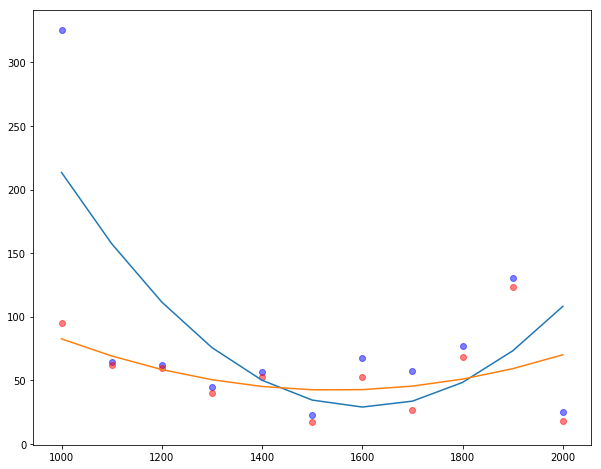

In [34]:
#graph of carying exit reward to step number
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nbimporter
import  math
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..') 

root='DATA/Testing'

reward=[]
totalMeanSteps=[]
validMeanSteps=[]

for path, subdirs, files in os.walk(root):
    for name in files:
        if(name=="RunsData.txt"):            
            exitReward=path.split("/")[2].split("_")[14]
            #print (os.path.join(path,name), exitReward)
            print(" ")
            file=open(os.path.join(path,name),"r")
            f=file.readlines()

            totalStep=[]
            correctStep=[]
            succeeded=0
            
            reward.append(float(exitReward))

            for l in range(len(f)):
                chosenLine=l
                run=f[chosenLine]
                runData=run[0:len(run)-1].split(" ")
                totalStep.append(float(runData[2]))
                if(runData[5]=="True"):
                    succeeded+=1
                correctStep.append(float(runData[4]))
                #print(runData)
            #correctStep
            print("Mean of total length: ", np.mean(np.asarray(totalStep)))
            print("Mean of correct length: ",np.mean(np.asarray(correctStep)))
            print("Success rate: ",succeeded/len(f))
            
            totalMeanSteps.append(np.mean(np.asarray(totalStep)))
            validMeanSteps.append(np.mean(np.asarray(correctStep)))
print(reward,totalMeanSteps)

colourTotal="blue"
plt.scatter(reward, totalMeanSteps, c=colourTotal, alpha=0.5 )
plt.plot(np.unique(reward), np.poly1d(np.polyfit(reward, totalMeanSteps, 2))(np.unique(reward)))

colourMean="red"
plt.scatter(reward, validMeanSteps, c=colourMean, alpha=0.5)
plt.plot(np.unique(reward), np.poly1d(np.polyfit(reward, validMeanSteps, 2))(np.unique(reward)))

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=8
plt.rcParams["figure.figsize"]=fig_size
plt.show()    


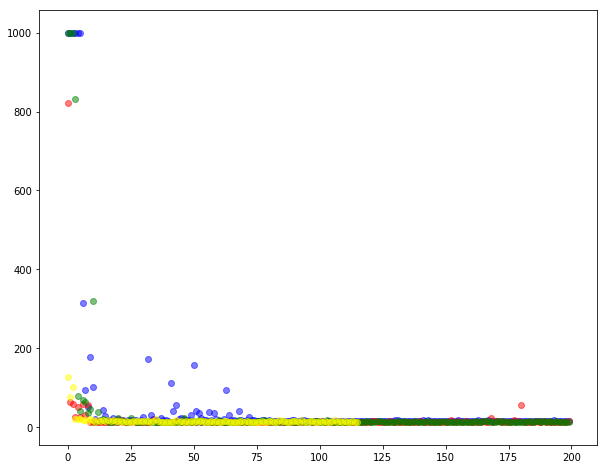

In [40]:
#graph of dddqn vs dqn
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nbimporter
import  math
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..') 

root='DATA/Testing' #/exp1/Workers_1'

def getData(path,index):
    reward=[]
    totalMeanSteps=[]
    validMeanSteps=[]

    for path, subdirs, files in os.walk(root+'/'+path):
        for name in files:
            if(name=="RunsData.txt"):            
                exitReward=1900 #path.split("/")[2].split("_")[14]
                #print (os.path.join(path,name), exitReward)
                print(" ")
                file=open(os.path.join(path,name),"r")
                f=file.readlines()

                data=[]
                step=[]

                reward.append(float(exitReward))

                for l in range(len(f)):
                    chosenLine=l
                    run=f[chosenLine]
                    #print(run)
                    runData=run[0:len(run)-1].split(" ")
                    data.append(float(runData[index]))
                    step.append(float(runData[1]))
                return step,data

step1, totalStep1=getData('exp1/Workers_1',2)
step2, totalStep2=getData('exp1/Workers_2',2)
step5, totalStep5=getData('exp1/Workers_5',2)
step10, totalStep10=getData('exp1/Workers_10',2)
colour1="blue"
plt.scatter(step1, totalStep1, c=colour1, alpha=0.5 )
#plt.plot(np.unique(step1), np.poly1d(np.polyfit(step1, totalStep1, 2))(np.unique(step1)))

colour2="red"
plt.scatter(step2, totalStep2, c=colour2, alpha=0.5 )
#plt.plot(np.unique(step2), np.poly1d(np.polyfit(step2, totalStep2, 2))(np.unique(step2)))

colour5="green"
plt.scatter(step5, totalStep5, c=colour5, alpha=0.5 )
#plt.plot(np.unique(step5), np.poly1d(np.polyfit(step5, totalStep5, 2))(np.unique(step5)))

colour10="yellow"
plt.scatter(step10, totalStep10, c=colour10, alpha=0.5 )
#plt.plot(np.unique(step10), np.poly1d(np.polyfit(step10, totalStep10, 2))(np.unique(step10)))

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=8
plt.rcParams["figure.figsize"]=fig_size
plt.show()    
